In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import plot_phase_portrait, plot_phase_portrait_nonlinear
from scipy.integrate import solve_ivp
from tqdm import tqdm

## Data


In [3]:
x_0 = pd.read_csv ('../data/nonlinear_vectorfield_data_x0.txt', sep = ' ', names=['x0_1', 'x0_2']).to_numpy()
x_1 = pd.read_csv ('../data/nonlinear_vectorfield_data_x1.txt', sep = ' ', names=['x0_1', 'x0_2']).to_numpy()
N, d = x_0.shape


## Task 1

In [32]:
dt = 0.01
v = (x_1 - x_0) / dt
A, res, rank, sigma = np.linalg.lstsq(x_0, v, rcond=-1) # solution, residual, rank, singular values
pred = x_0 + (A @ x_0.T).T * dt
mse = ((x_1 - pred ) ** 2).sum() / N
mse

0.03728697125740119

<AxesSubplot:>

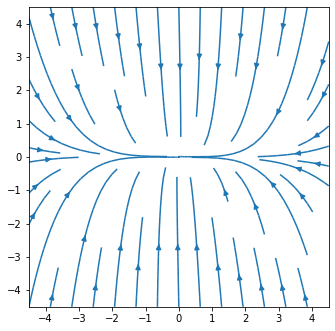

In [33]:
w = 4.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
plot_phase_portrait(A, X, Y)

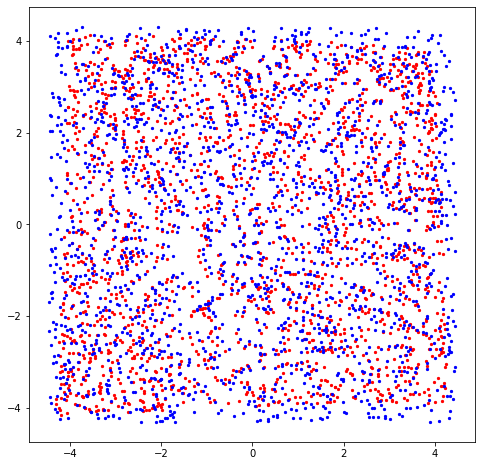

In [39]:
plt.rcParams["figure.figsize"] = (8,8)

plt.scatter(x_1[:,0], x_1[:,1] ,s = 5, c = 'red')
plt.scatter(pred[:,0], pred[:,1] ,s = 5, c = 'blue')
plt.show()

## Task 2

In [35]:
Y, X = np.mgrid[-w:w:complex(0, 10), -w:w:complex(0, 10)]
basis = np.array([[X[i][j], Y[i][j]] for i in range(len(X)) for j in range(len(Y))])

ep = 0.5
phi = np.exp(-((x_0.reshape(N, 1, d) - basis) ** 2).sum(-1) / ep )
C, res, rank, sigma = np.linalg.lstsq(phi, v, rcond=-1) # solution, residual, rank, singular values

pred_2 = x_0 + (phi @ C) * dt
mse = ((x_1 - pred_2) ** 2).sum() / N
mse

8.183326796547391e-05

<AxesSubplot:>

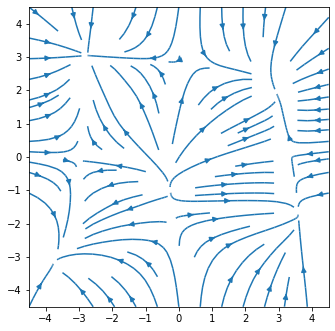

In [36]:
plot_phase_portrait_nonlinear(C, basis, X, Y, ep)

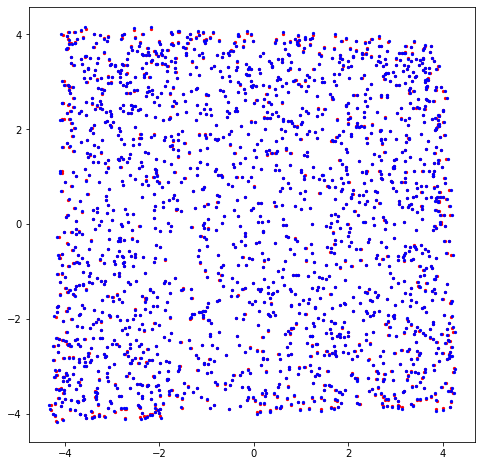

In [38]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x_1[:,0], x_1[:,1] ,s = 5, c = 'red')
plt.scatter(pred_2[:,0], pred_2[:,1] ,s = 5, c = 'blue')
plt.show()

## Task 3

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:11<00:00, 175.18it/s]


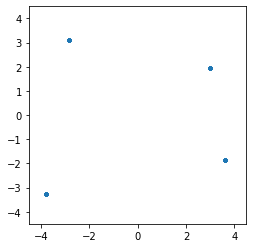

In [9]:
# Predict x1 with a larger time to find the steady states
def f(t, x):
    phi_ = np.exp(-((x.reshape(-1, 1, d) - basis) ** 2).sum(-1) / ep)
    fx = phi_ @ C
    return fx

w=4.5
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-w, w)
ax.set_ylim(-w, w)

t = 5
x1_pred = []
for i in tqdm(range(len(x_0))):
    y = solve_ivp(f, (0, t), x_0[i], t_eval=np.array([t])).y
    x1_pred.append(np.ndarray.flatten(y))
x1_pred = np.array(x1_pred)
ax.scatter(x1_pred[:, 0], x1_pred[:, 1], s = 10)
ax.set_aspect(1)
plt.show()